<a href="https://colab.research.google.com/github/RaulAtLehigh/CSE337_P1/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [127]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -496
Episode 2: total reward = -892
Episode 3: total reward = -298
Episode 4: total reward = -1189
Episode 5: total reward = -1387


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [144]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 10000     # number of episodes to run
max_steps = 100     # safety cap
sarsaRewards = np.zeros(n_episodes)
# Q-learning parameters
learning_rate = 0.1 # alpha
discount_factor = 0.99 # lambda
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

def greedyPolicy(state, Q): # assuming I can index by state
  return np.argmax(Q[state])

# call using action = self.greedyPolicy()
epsilon = .05

"""
if(step % (max_steps * epsilon) == 0):
      action = env.action_space.sample()
"""

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0
    action = greedyPolicy(state, Q)
    next_action = 0
    for step in range(max_steps):
        next_state, reward, terminated, truncated, info = env.step(action)
        # e-greedy policy
        if(step % (max_steps * epsilon) == 0):
          next_action = env.action_space.sample() # random for this one
        else:
          next_action = greedyPolicy(next_state, Q)
        total_reward += reward
        Q[state][action] = Q[state][action] + learning_rate* ((reward + discount_factor * (Q[next_state][next_action])) - Q[state][action])
        state = next_state
        action = next_action

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")
    sarsaRewards[episode] = total_reward

env.close()




Streaming output truncated to the last 5000 lines.
Episode 5001: total reward = -199
Episode 5002: total reward = -194
Episode 5003: total reward = -100
Episode 5004: total reward = -100
Episode 5005: total reward = -100
Episode 5006: total reward = -199
Episode 5007: total reward = -100
Episode 5008: total reward = -165
Episode 5009: total reward = -95
Episode 5010: total reward = -85
Episode 5011: total reward = -100
Episode 5012: total reward = -100
Episode 5013: total reward = -71
Episode 5014: total reward = -199
Episode 5015: total reward = -62
Episode 5016: total reward = -100
Episode 5017: total reward = -99
Episode 5018: total reward = -100
Episode 5019: total reward = -84
Episode 5020: total reward = -100
Episode 5021: total reward = -199
Episode 5022: total reward = -100
Episode 5023: total reward = -100
Episode 5024: total reward = -199
Episode 5025: total reward = -100
Episode 5026: total reward = -100
Episode 5027: total reward = -96
Episode 5028: total reward = -100
Epis

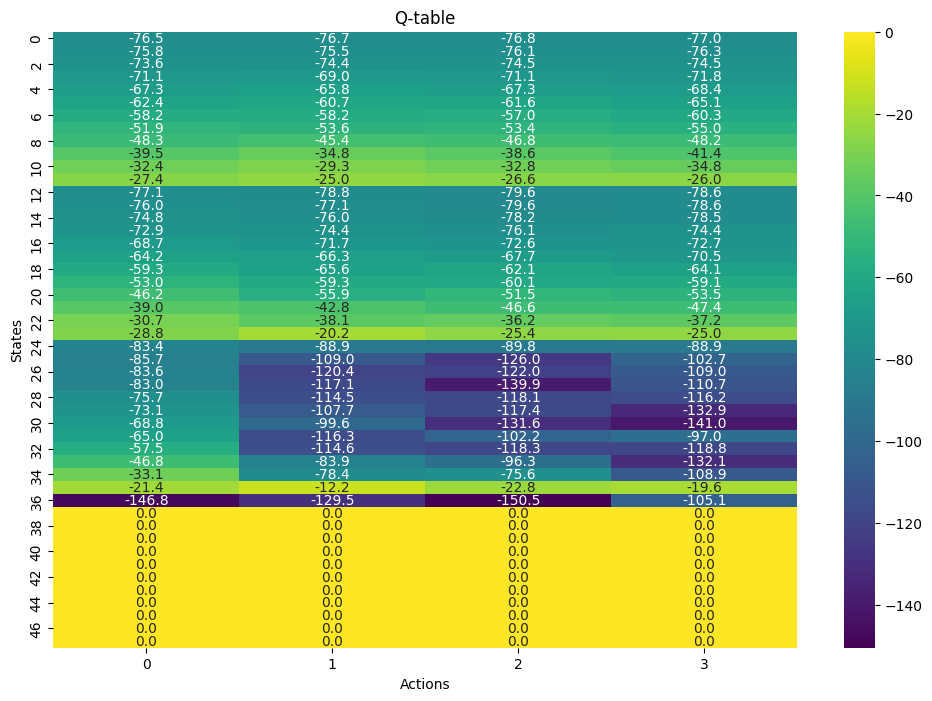

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

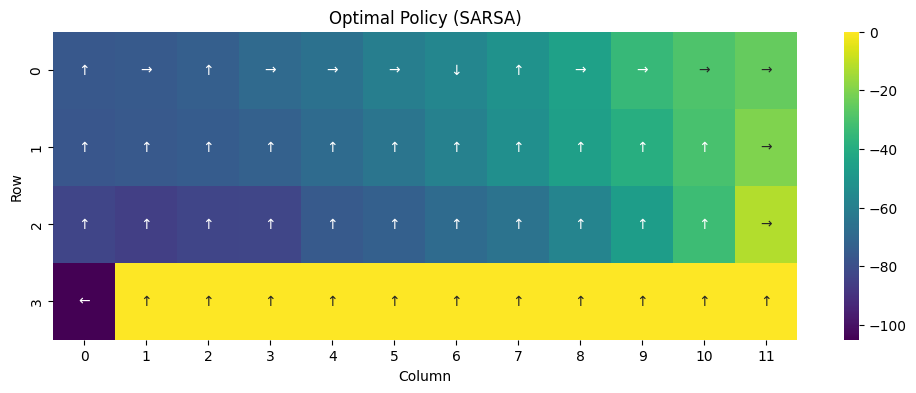

In [146]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (" + title + ")")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [131]:
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
qLearnRewards = np.zeros(n_episodes)

# Q-learning parameters
learning_rate = 0.1 # alpha
discount_factor = 0.99 # lambda
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

def greedyPolicy(state, Q): # assuming I can index by state
  return np.argmax(Q[state])

# call using action = self.greedyPolicy()

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0
    action = greedyPolicy(state, Q)
    next_action = 0
    for step in range(max_steps):
        next_state, reward, terminated, truncated, info = env.step(action)
        # e-greedy policy
        next_action = greedyPolicy(next_state, Q)
        total_reward += reward
        Q[state][action] = Q[state][action] + learning_rate* ((reward + discount_factor * (Q[next_state][next_action])) - Q[state][action])
        state = next_state
        action = next_action

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")
    qLearnRewards[episode] = total_reward
env.close()

Episode 1: total reward = -100
Episode 2: total reward = -298
Episode 3: total reward = -272
Episode 4: total reward = -298
Episode 5: total reward = -199
Episode 6: total reward = -199
Episode 7: total reward = -100
Episode 8: total reward = -199
Episode 9: total reward = -199
Episode 10: total reward = -199
Episode 11: total reward = -100
Episode 12: total reward = -199
Episode 13: total reward = -97
Episode 14: total reward = -100
Episode 15: total reward = -100
Episode 16: total reward = -100
Episode 17: total reward = -57
Episode 18: total reward = -100
Episode 19: total reward = -95
Episode 20: total reward = -100
Episode 21: total reward = -100
Episode 22: total reward = -83
Episode 23: total reward = -93
Episode 24: total reward = -89
Episode 25: total reward = -100
Episode 26: total reward = -53
Episode 27: total reward = -100
Episode 28: total reward = -63
Episode 29: total reward = -100
Episode 30: total reward = -91
Episode 31: total reward = -39
Episode 32: total reward = 

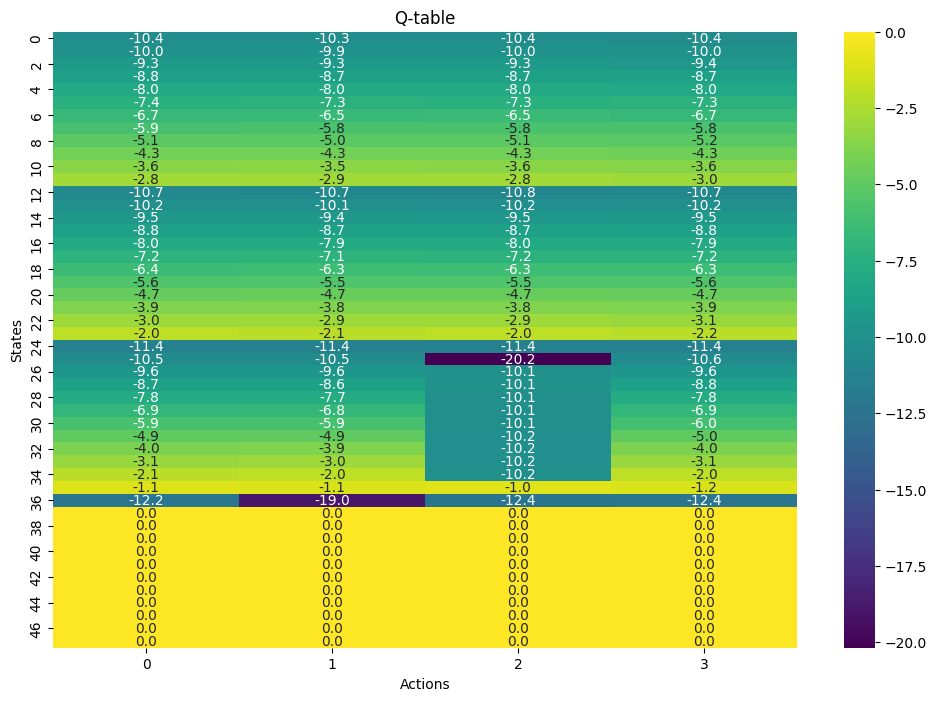

In [132]:
plot_Q(Q)

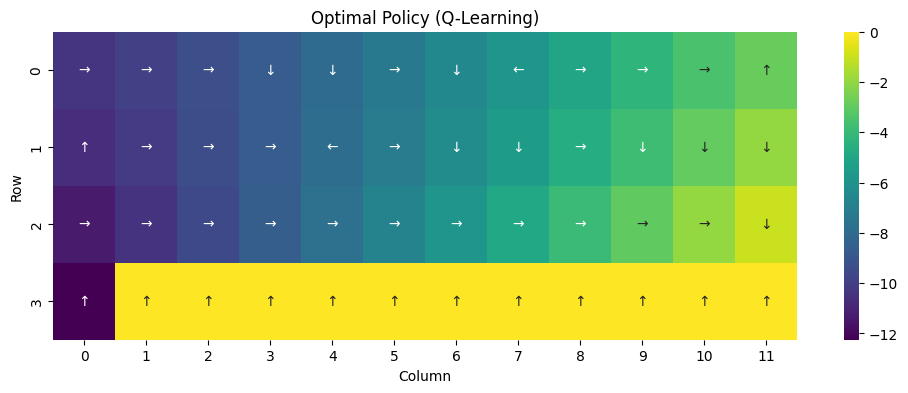

In [133]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


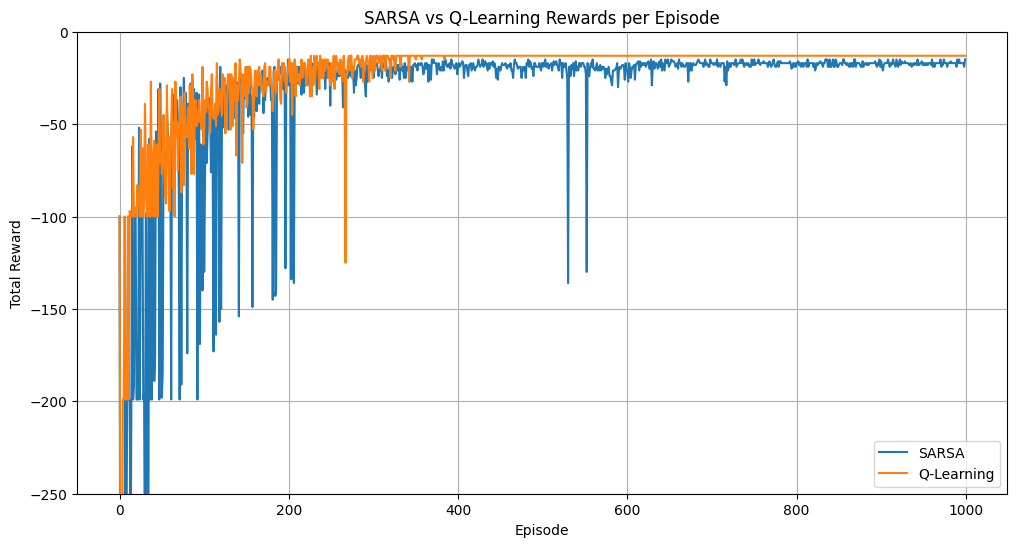

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sarsaRewards, label='SARSA')
plt.plot(qLearnRewards, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA vs Q-Learning Rewards per Episode')
plt.ylim([-250, 0])
plt.legend()
plt.grid(True)
plt.show()

# is_slippery = True

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
